{% include toc title = "In This Lesson" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* Describe the difference between human and machine readable data structures.
* Describe the difference between data returned using an API compared to downloading a text file directly.
* Describe 2-3 components of a RESTful API call.
* List different ways to access data programmatically in Python.

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need

You will need a computer with internet access to complete this lesson.

</div>

## Access Data Programmatically

This week, you will learn how to programmatically access data using:

1. Direct downloads / import of data.
2. Applied Programming Interfaces (APIs).

Up until this point, you have been downloading data from a website (in the case of 
this course, <a href="https://figshare.com/authors/_/3386570" target="_blank">Figshare</a>) independently. Then, you work with the data in `Python`. The data that you have downloaded are prepared specifically for this course. 

However, independently downloading and unzipping data each week is not efficient and does not explicitly tie your
data to your analysis.

You can automate the data download process using `Python`. Automation is particularly useful when:

* You want to download lots of data or particular subsets of data to support an analysis.
* There are programmatic ways to access and query the data online.

### Link Data Access to Processing & Analysis

When you automate data access, download, or retrieval, and embed it in your code, 
you are **directly** linking your analysis to your data. Further, combined with  Jupyter Notebooks, code comments and expressive coding techniques, you are better documenting your workflow. 

In short - by linking data access and download to your analysis - you are not only reminding your future selves of your process - you are also reminding your future self where (and how) you got the data in the first place! Similarly, this allows your workflow to be easily reproduced by others. 

## Three Ways to Access Data

You can break up programmatic data access into three general categories:

1. Data that you download by calling a specific URL and using the `Pandas` function `read_table`, which takes in a url.
2. Data that you directly import into `Python` using the `Pandas` function `read_csv`.
3. Data that you download using an API, which makes a **request** to a data repository and **returns** requested data.

### Two Key Formats

The data that you access programmatically may be returned in one of two main formats:

1. **Tabular Human-readable file:** Files that are tabular, including CSV files (Comma Separated Values) and even spreadsheets (Microsoft Excel, etc.). These files are organized into columns and rows and are "flat" in structure rather than hierarchical.
2. **Structured Machine-readable files:** Files that can be stored in a text format but are hierarchical and structured in some way that optimizes machine readability. JSON files are an example of structured machine-readable files.

<i class="fa fa-lightbulb-o" aria-hidden="true"></i> **Data Tip:** There are non-text formatted hierarchical data structures that you will not learn in this module. One example of this is the HDF5 data model (structure).
{: .notice--success}

### Download Files Programmatically

####  `Pandas` function `read_csv()`

Note that you can use the `read_csv()` function from `Pandas` to import data directly into `Python` by providing a URL to the CSV file (e.g. `read_csv(URL)`). 

When you programmatically read data into `Python` using `read_csv()` you are not saving a copy of your data locally, on your computer - you are importing the data directly into `Python`. 

If you want a copy of that data to use for future analysis without directly importing it, you will need to export the data to your working directory using `write_csv()`.

Below is an example of directly importing data into `Python` using `read_csv()`. The data are average annual temperature in Canada from the World Bank. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
url = "http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv"
df = pd.read_csv(url)

df.head()

,year,data
0,1901,-7.672419
1,1902,-7.862711
2,1903,-7.910783
3,1904,-8.155729
4,1905,-7.547311


#### Human Readable Data

Notice that the data that you downloaded above using are **tabular** and thus **human-readable**. The data are organized into a tabular structure with rows and columns that you can quickly understand. `Python` can import these data into a `Pandas DataFrame` and you can work with it programmatically.

However, what happens if your data structure is more complex? For example, what if you wanted to store more information about each measured precipitation data point? Your table could get very wide very quickly making is less readable but also more computationally intensive to process.

You will learn about structured machine readable data structures later in this module, which may be hard for humans to quickly digest when you look at them but are much more efficient to process - particular as your data get large.

## What is an API?

An API (Application Programming Interface) is an interface that sits on top of a
computer based system and simplifies certain tasks, such as extracting subsets
of data from a large repository or database.

### Using Web-APIs

Web APIs allow you to access data available via an internet web interface.

Often you can access data from web APIs using a URL that contains sets of parameters 
that specifies the type and particular subset of data that you are interested in.

If you have worked with a database such as `Microsoft SQL Server` or `PostgreSQL`, or if you've ever queried data from a GIS system like ArcGIS, then you can compare the set of parameters associated with a URL string to a SQL query.

> Web APIs are a way to strip away all the extraneous visual interface that
> you don't care about and get the data that you want.

### Why You Use Web APIs

Among other things, APIs allow us to:

* Get information that would be time-consuming to get otherwise.
* Get information that you can't get otherwise.
* Automate an analytical workflows that require continuously updated data.
* Access data using a more direct interface.

### Three Parts of an API Request

When we talk about APIs, it is important to understand two key components: the request and the response. The third part listed below is the intermediate step where the request is PROCESSED by the remote server.

1. Data **REQUEST**: You try to access a `URL` in your browser that specifies a particular subset of data.
2. **Data processing:** A web server somewhere uses that url to query a specified dataset.
3. Data **RESPONSE**: That web server then sends you back some content.

The **response** may give you one of two things:
1. Some *data* or
2. An explanation of why your request *failed*

<figure>
 <a href="{{ site.url }}/images/courses/earth-analytics/apis/consume-rest-basic-anatomy-mulesoft.png">
 <img src="{{ site.url }}/images/courses/earth-analytics/apis/consume-rest-basic-anatomy-mulesoft.png" alt="RESTful response vs request."></a>
    <figcaption>First, you create a request that queries the data repository for some data using the API. The repository gets the request and in turn processes it. Finally, it responds. If your request was a good one, the response will include the data that you are interested in. <a href="https://docs.mulesoft.com/mule-user-guide/v/3.7/consuming-a-rest-api" target="_blank">Image Source</a>
    </figcaption>
</figure>

### API Endpoints

When we talk about an endpoint, we are referring to a datasource available
through an API. These data may be census data, geospatial base maps, water quality
or any type of data that has been made available through the API.

### RESTful Web APIs

There are many different types of web APIs. One of the most common types is
a `REST`, or `REST`ful, API. A *RESTful* API is a web API that uses
URL arguments to specify what information you want returned through the API.

To put this all into perspective, next, you will explore a RESTful API interface
example.

### Colorado Population Projection Data

The <a href="https://data.colorado.gov" target="_blank">Colorado Information Marketplace</a>
is a data warehouse that provides access to a wide range of Colorado-specific
open datasets available via a **REST**ful API called the Socrata Open Data API (SODA)

There are lots of API *endpoints* or data sets available through this API.

* <a href="https://data.colorado.gov/browse" target="_blank">Check some of the data available on the site out in the browse section of the website. </a>
* <a href="https://data.colorado.gov/browse?category=Demographics" target="_blank">Check out the available demographic data. </a>
* <a href="https://data.colorado.gov/Demographics/Colorado-Population-Projections/q5vp-adf3" target="_blank">Colorado population projects data landing page. </a>


One endpoint contains Colorado Population Projection data.
If you click on the link to the <a href="https://data.colorado.gov/resource/tv8u-hswn.json" target="_blank">CO Population projection data</a>, you will see data returned
in a `JSON` format.

`JSON` is a **structured, machine readable format**. You will learn more about
it in the next lesson.

### Population Data Request and Response

The CO population project data contain projected population estimates for *males* and
*females* for every *county* in Colorado for every *year* from 1990 to 2040 for
multiple *age* groups.

Phew! In the previous sentence, you just specified all
of the variables stored within these data. These variables can be used to query
the data! This is your data **request**.

Below, you see a small subset of the **response** that you get from a basic request
with no URL parameters specified: <a href="https://data.colorado.gov/resource/tv8u-hswn.json" target="_blank">https://data.colorado.gov/resource/tv8u-hswn.json</a>. Notice that the **response** in this case is returned in `JSON` format.


```json
[{"age":"0","county":"Adams","femalepopulation":"2404.00","fipscode":"1","malepopulation":"2354.00","totalpopulation":"4758","year":"1990"}
,{"age":"1","county":"Adams","femalepopulation":"2375.00","fipscode":"1","malepopulation":"2345.00","totalpopulation":"4720","year":"1990"}
,{"age":"2","county":"Adams","femalepopulation":"2219.00","fipscode":"1","malepopulation":"2413.00","totalpopulation":"4632","year":"1990"}
,{"age":"3","county":"Adams","femalepopulation":"2261.00","fipscode":"1","malepopulation":"2321.00","totalpopulation":"4582","year":"1990"}
,{"age":"4","county":"Adams","femalepopulation":"2302.00","fipscode":"1","malepopulation":"2433.00","totalpopulation":"4735","year":"1990"},
...
]
```

### URL Parameters

Using `URL` parameters, you can define a more specific request to limit what data
you get back in **response** to your API request. For example, you can query the data
to only return data for Boulder County, Colorado using the RESTful call.

<i class="fa fa-lightbulb-o" aria-hidden="true"></i> **Data Tip:** Note the **?&county=Boulder** part of the url below. That is an important part of the API
request that tells the API to only return a subset of the data - where county = Boulder. `https://data.colorado.gov/resource/tv8u-hswn.json?&county=Boulder`
{: .notice--success}

<a href="https://data.colorado.gov/resource/tv8u-hswn.json?&county=Boulder" target="_blank">Like this:  https://data.colorado.gov/resource/tv8u-hswn.json?&county=Boulder</a>.

Notice that when you visit the URL above and in turn **request** the data for Boulder
County, you see that now the **response** is filtered to **only include Boulder County data**.

```json
[{"age":"66","county":"Boulder","femalepopulation":"649","fipscode":"13","malepopulation":"596","totalpopulation":"1245","year":"1997"}
,{"age":"78","county":"Boulder","femalepopulation":"427","fipscode":"13","malepopulation":"258","totalpopulation":"685","year":"1992"}
,{"age":"85","county":"Boulder","femalepopulation":"265","fipscode":"13","malepopulation":"110","totalpopulation":"375","year":"1991"}
,{"age":"74","county":"Boulder","femalepopulation":"516","fipscode":"13","malepopulation":"373","totalpopulation":"889","year":"1996"},
...
]
```

Parameters associated with accessing data using this API are <a href="https://dev.socrata.com/foundry/data.colorado.gov/tv8u-hswn" target="_blank">documented here</a>.

## Using the SODA RESTful API

The `SODA` RESTful API also allows us to specify more complex 'queries'. Here's
the API `URL` for population projections for females who live in Boulder that
are between the ages of 20--40 for the years 2016--2025:

`https://data.colorado.gov/resource/tv8u-hswn.json?$where=age between 20 and 40 and year between 2016 and 2025&county=Boulder&$select=year,age,femalepopulation`

```json
[{"age":"32","femalepopulation":"2007","year":"2024"}
,{"age":"35","femalepopulation":"1950","year":"2016"}
,{"age":"37","femalepopulation":"2039","year":"2019"}
,{"age":"30","femalepopulation":"2087","year":"2025"}
,{"age":"26","femalepopulation":"1985","year":"2019"}
,{"age":"22","femalepopulation":"3207","year":"2016"}
...
]
```

<a href="https://data.colorado.gov/resource/tv8u-hswn.json?$where=age between 20 and 40 and year between 2016 and 2025&county=Boulder&$select=year,age,femalepopulation" target="_blank"> Click here to view the full API response</a>.


### Breaking Down an API String

Notice that the `colorado.data.gov` API URL above, starts with
`data.colorado.gov` but then has various parameters attached to the end of the URL
that specify the particular type of information that you are looking for.

A few of the parameters that you can see in the url are listed below:

* **The Data set itself:** /tv8u-hswn.json
* **AGE:** where=age between 20 and 40
* **YEAR:** year between 2016 and 2025
* **COUNTY:** county=Boulder
* **Columns to get:** select=year,age,femalepopulation

### JSON Structured Text Format API Response

The response data that are returned from this API are in a text format, structured
using `JSON`.

<div class="notice--warning" markdown="1">
<i class="fa fa-lightbulb-o" aria-hidden="true"></i> **Data Tip:**
Many APIs allow you to specify the file format that you want to be returned.
Learn more about how this works with the CO data warehouse
<a href="https://dev.socrata.com/docs/formats/index.html" target="_blank">here.</a>

* <a href="https://data.colorado.gov/resource/tv8u-hswn.json" target="_blank">JSON format </a>
* <a href="https://data.colorado.gov/resource/tv8u-hswn.geojson" target="_blank">GeoJSON format</a>
* <a href="https://data.colorado.gov/resource/tv8u-hswn.xml" target="_blank">XML format</a>
* <a href="https://data.colorado.gov/resource/tv8u-hswn.csv" target="_blank">CSV format</a>

</div>


Notice that the first few rows of data returned via the query above with a `.csv`
suffix look like this:

```json
"age","femalepopulation","year"
"32","2007","2024"
"35","1950","2016"
"37","2039","2019"
"30","2087","2025"
"26","1985","2019"
...
```



Here is a different application of the same type of API. Here, the website developers <a href="https://data.colorado.gov/Demographics/Population-Colorado/eeah-cmy8" target="_blank">have built a tabular viewer that we can use to look at and interact with the population data.
</a> These data are the same data that you can download using the **REST** API
url string above. However, the developers have wrapped the API in a cool interface
that allows us to view the data directly, online.

You will work with these data in `R` directly in the following lessons, but for now
just notice how the API access works in this case.

1. Data **REQUEST**: You try to access a `URL` in your browser.
2. **Data processing:** A web server somewhere uses that url to query a specified dataset.
3. Data **RESPONSE**: That web server then sends you back some content.



<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional Challenge

Explore creating SODA API calls to the
<a href="https://dev.socrata.com/foundry/data.colorado.gov/tv8u-hswn" target="_blank">Colorado data warehouse.</a>
Go to the bottom of the page and check out each variable that you can query on.
</div>


## Open JSON API Data Directly Using Pandas in Python\n",
You can quickly open the JSON-formatted data using `read_json` in Pandas.
However, notice that there are spaces in between some of the words in the URL.
These spaces will yield an error. To address the spaces, you can replace them
with the ascii value `%20` using `string.replace()`. The code below fixes
the url so you can open the data using Pandas.


In [4]:
# Generate the url & replace spaces
url = "https://data.colorado.gov/resource/tv8u-hswn.json?$where=age between 20 and 25 and year between 2016 and 2025&county=Boulder&$select=year,age,femalepopulation"
url = url.replace(" ","%20")    
url

'https://data.colorado.gov/resource/tv8u-hswn.json?$where=age%20between%2020%20and%2025%20and%20year%20between%202016%20and%202025&county=Boulder&$select=year,age,femalepopulation'

In [6]:
# Read in the data
dem_data_20_25_female = pd.read_json(url)
dem_data_20_25_female.head()

,year,age,femalepopulation
0,2016,20,3774
1,2016,21,3580
2,2016,22,3247
3,2016,23,2569
4,2016,24,2109


In [7]:
# set year as index
dem_data_20_25_female = dem_data_20_25_female.set_index("year")
dem_data_20_25_female.head()

,age,femalepopulation
year,,
2016,20,3774
2016,21,3580
2016,22,3247
2016,23,2569
2016,24,2109


In [9]:
# Pivot the data for stacked plotting
dem_data_20_25_female_pivot = dem_data_20_25_female.pivot_table('femalepopulation', ['year'], "age")
dem_data_20_25_female_pivot.head()

age,20,21,22,23,24,25
year,,,,,,
2016,3774,3580,3247,2569,2109,2287
2017,3746,3622,3184,2682,2090,2052
2018,3864,3596,3227,2619,2312,2119
2019,3816,3703,3192,2654,2242,2333
2020,3868,3684,3322,2633,2285,2269


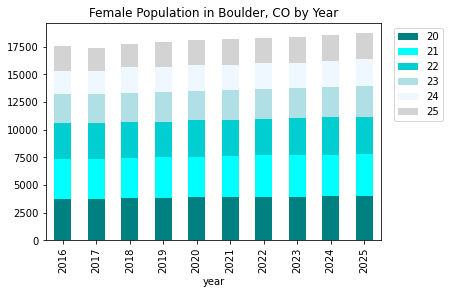

In [11]:
# Plot the data
my_colors = ["teal", "aqua",
             "darkturquoise",
             "powderblue",
             "aliceblue", 
             "lightgrey"]

f, ax = plt.subplots()
dem_data_20_25_female_pivot.plot.bar(stacked=True,
                                     color=my_colors,
                                     ax=ax).legend(loc='upper right',
                                                   bbox_to_anchor=(1.2, 1.0))
ax.set(title="Female Population in Boulder, CO by Year")

plt.show()

In [16]:
# THIS will only work if you have plotly installed
# uncomment code to run - plotly is not  yet in our ea-environment but will be added
# conda install -c conda-forge plotly
# pd.options.plotting.backend = "plotly"
# dem_data_20_25_female_pivot.plot.bar(title="Female Population in Boulder, CO by Year")

<div class="notice--info" markdown="1">

## Additional Resources

### More About JSON

* <a href="http://www.w3resource.com/JSON/introduction.php" target="_blank">JSON tutorial</a>

### Using APIs

So, how do you learn more about APIs? Below are some resources ...

* <a href="http://www.programmableweb.com" target="_blank">Find APIs and read more about them</a>
* <a href="https://dev.twitter.com/overview/documentation" target="_blank">Twitter API Documentation</a>
* <a href="https://developer.nytimes.com/apis" target="_blank">New York Times API Information</a>
* <a href="https://www.wunderground.com/weather/api" target="_blank">Weather Underground API Information</a>
* <a href="http://envirocar.github.io/enviroCar-server/api/" target="_blank">EnviroCar API Information</a>

The documentation in the URL's above describes the different types of *requests*
that you can make to the data provider. For each request `URL` you need to specify
the parameters and consider the response.

</div>